# Convolutional Neural Networks

__Prerequisites__

- [Neural Networks](https://github.com/AI-Core/Neural-Networks/blob/master/Neural%20Networks.ipynb)

## What's wrong with how neural networks process images?

The fully connected neural network we looked at in the previous lesson takes in a vector as input. So we flattened our images by stacking the rows so that it could be passed in as input and used for classification problems successfully. 

#### Spacially structured data

For some problems, the order of the features in each example does not matter (e.g. age, height, hair length). But this isn't the case for images. If we randomly reorder the pixels in an image, then it will likely be unrecognisable. Most of the useful information in images comes not from the values of the features (pixels), but from their relative positions. The same is true for processing any other **spacially structured** data such as videos, soundwaves, medical scans, 3D-models etc. 

The spatial relationships between the different pixels is information that is crucial to our understanding of an image. When we flatten the image, we lose this information.

#### Weight sharing across space

Regardless of where I see something interesting in my field of view, it can often be processed in the same way. 

Neural networks have individual weights for each input feature because they expect each feature to represent a totally different thing (e.g. age, height, weight). In other domains like computer vision however, different features (pixels) can represent the same thing just in different locations (e.g. money on my left, money on my right).

Instead of learning to look for the same features of an image with different weights for each position that that feature might be in, we should try to share the same learnt weights over all positions of the input. This will save us both time and memory in computing and storing these duplicate weights. 

#### So what

Using our prior understanding of how image data should be processed spacially, we'd like to find some kind of model that can retain the spacial structure of an input, and look for the same features over the whole of this space. This is what we will use convolutional neural networks for.

## Images as data

Images are not naturally vectors. They obviously have a height and a width rather than just a length - so they need to at least be a matrix. 

#### Channels

Any non-black color can be made by combining 3 primary colors.
As such, as well as height and width, color images have another axis called the **channels**, which specifies the intensity (contribution) of each of these primary colors.
Red, green and blue are the (arbitrary) standard primary colors. 
So most images that we will work with have a red channel, a green channel and a blue channel.
This is illustrated below.

![image](images/CNN_RGB.JPG)

Some images can also have transparent backgrounds, in which case they might have a fourth channel to represent the opacity at each pixel location.

## How was computer vision done before deep learning?

In the past, people would try to draw patterns that they thought would appear in images and be useful for the problem that they were trying to solve. This was a painstakingly long process, and was obviously susceptible to a lot of bias by these feature designers.

## Filters/Kernels
These supposedly useful patterns mentioned above are known as **filters** or **kernels**. 
Each filter looks for a particular pattern.
E.g. a filter that looks for circles would have high values in a circle and low values in other locations.

![title](images/kernels.jpg)

Filters *look* for the patterns they represent by seeing how similar the pixels at any particular location match the values that they contain. A mathematically convenient way to do this is by taking a **dot product** between the filter's values and the input values which it covers - an element wise multiplication and sum of the results. **This produces a single value** which should be larger when the input better matches the feature that the filter looks for.

It is standard for filters to always convolve through the full depth of the input. So if we have an input with 3 channels (e.g. a color image), our kernel will also have a depth of 3 - where each channel of the filter is what it looks for from that corresponding color channel. If our input has 54 channels, then so will our filter. 

The width and height of our kernels is up to us (they are hyperparameters). It's standard to have kernels with equal width and height.

## The convolution operation

In machine learning, convolution is the proccess of moving a filter across every possible position of the input and computing a value for how well it is matched at each location. 

This pattern matching over the spacially structured input produces a similar spacially structured output. We call this output an **activation map** or a **feature map** because it represents the activations in the next layer that should represent some higher level (more complex) features than the feature maps in the input.

The animation below shows how a 1x3x3 filter is applied to a 1x5x5 image (for simplicity, input channels = 1). 
On the left is the filter that we will convolve over the input. In the centre is the input being convolved over. On the right is the output activation map produced by convolving this filter over this input.

Notice how the output has high  values when the filter is passed over locations where there is an X shape in the input image. This is because the values of the filter are such that it is performing pattern matching for the X shape.

![image](images/convolution_animation.gif)

The convolution operation has a few possible parameters:

### Stride
The stride is the number of pixels we shift our kernel along by to compute the next value in the output activation map. Increased stride means less values are computed for the output activation map, which means that we have to do less computation and store less output information, decreasing computing time and cost and reducing memory requirements but reducing output resolution.

### Padding
We can *pad* the input with a border of extra pixels around the edge. Why might we want to do this?

##### Model depth limitations

When we use a kernel size larger than one, each single output value is a function of many input values (all the pixels which the filter covers). This means that the size of the convolution output is smaller than the input. As such, there is a limit to the number of successive convolutions that we can apply because eventually the input gets so small that there is only one location of the input that the filter can be placed on the input and the output will then have a height and width of 1 and cannot be convolved over (convolution with a 1x1 filter is equivalent to multiplication).

##### Equal input from each pixel

When we use a kernel size larger than one, the corner pixels will only contribute to a single output value because they only enter the kernel at it's very extreme positions. As such they contribute less to the final predictions than the other pixels. The same is true for pixels near the edge, but to a lesser extent.

#### Different padding modes

We can use different "padding modes" to specify what we pad the image with. Options include padding it with zeros, continuing the last color outwards, reflecting the inwards colors. See options provided by PyTorch [here](

![image](images/CNN_diagram.JPG)

For convolution, each computed value in the output feature map is a linear function of the pixels in a local region of the input as opposed to fully connected nets where each computed feature is a linear function of all the values in the input.

## The convolutional layer

In practice, we want to look for more than just one feature in any input. When we used a neural network, each layer had multiple outputs corresponding to different learnt features. Similarly, instead of convolving just a single filter over the input to produce a single activation map, we convolve many filters over the input to produce many activation maps. This produces a stack of activation maps as the output. The output then has an extra dimension, in addition to the spacial ones, which corresponds to which output activation map you're looking at. This dimension is the convolutional analogy to the number of outputs from a linear layer.

Also just like linear layers, convolutional layers apply a simple linear transformation to their input and can be applied successively with activation functions to represent very complex non-linear transformations. Models with such layers are **convolutional neural networks**. These are appropriate for tackling problems like object detection and image segmentation. These convolutional layers have values for each weight within each filter and also include biases to shift each output feature. 
Just like before, each successive layer in the network learns successively higher level abstract features from the inputs.

These convolutional layers are also provided by PyTorch. In this notebook we will use `torch.nn.Conv2D` to convolve over our input in 2 directions (width and height).

![image](images/CNN_FNN_comparison.JPG)

## What does each filter look for?
Engineers used to have to tune filter values manually. Now, just like the weights and biases in linear layers of neural networks, they can be learnt automatically by backpropagation and gradient descent.

## Pooling layers
Immediately after a convolutional layer, it is common to apply some form of **pooling**. Pooling is a technique that summarises/downsamples the values in a local region of its input. This reduces the number of values in its output, therefore reducing the number of parameters that need to be learned for a succeeding parameterised operation such as a further convolutional or linear layer.

Because pooling summarises values in local spacial regions it can help models to be robust under translation of the input, making them more **translation invariant**.

Pooling layers also slide kernels over their input, and reduce the values within that grid location to a single value. But they perform different operations than a linear combination like in convolution (see below).

**Max pooling** replaces the values at each grid location with their maximum.

**Average Pooling** replaces the values at each grid location with their average.

See the PyTorch [docs](https://pytorch.org/docs/stable/nn.html#pooling-layers) for more pooling layers

## The output of convolutional neural networks

Unless we keep applying convolutional layers to our data until it is reduced to a height and width of 1, the output will still retain some spacial dimensions. This means that as well as our input, our output can also be an image for example. This can be useful for problems such as image segmentation, where the output is a pixelwise classification mask of everything in the scene. In this case the output is the same shape as the input image, but with each pixel location taking the value of a class label (e.g. all pixels of cars in the image have value=1, all roads have value=2 etc).

In our case though, we want to perform image classification for 10 classes. It is common practice to flatten the output of the convolutional layers of a network into a vector, and then transform them into a vector of the desired output shape by applying a final linear layer. This is what we do below

## Let's implement a convolutional neural network

The first cell is just the same boilerplate we've used before. Make sure you understand it and then run it.

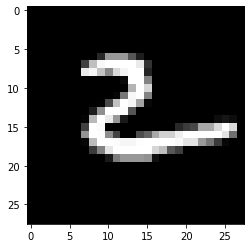

In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

# GET THE TRAINING DATASET
train_data = datasets.MNIST(root='MNIST-data',                        # where is the data (going to be) stored
                            transform=transforms.ToTensor(),          # transform the data from a PIL image to a tensor
                            train=True,                               # is this training data?
                            download=True                             # should i download it if it's not already here?
                           )

# GET THE TEST DATASET
test_data = datasets.MNIST(root='MNIST-data',
                           transform=transforms.ToTensor(),
                           train=False,
                          )

x = train_data[np.random.randint(0, 300)][0]    # get a random example
#print(x)
plt.imshow(x[0].numpy(),cmap='gray')
plt.show()

# FURTHER SPLIT THE TRAINING INTO TRAINING AND VALIDATION
train_data, val_data = torch.utils.data.random_split(train_data, [50000, 10000])    # split into 50K training & 10K validation

batch_size = 128

# MAKE TRAINING DATALOADER
train_loader = torch.utils.data.DataLoader(
    train_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE VALIDATION DATALOADER
val_loader = torch.utils.data.DataLoader(
    val_data,
    shuffle=True,
    batch_size=batch_size
)

# MAKE TEST DATALOADER
test_loader = torch.utils.data.DataLoader(
    test_data,
    shuffle=True,
    batch_size=batch_size
)

In [2]:
import torch.nn.functional as F

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
            # conv2d(in_channels, out_channels, kernel_size)
            # in_channels is the number of layers which it takes in (i.e.num color channels in 1st layer)
            # out_channels is the number of different filters that we use
            # kernel_size is the depthxwidthxheight of the kernel#
            # stride is how many pixels we shift the kernel by each time
        self.conv_layers = torch.nn.Sequential( # put your convolutional architecture here using torch.nn.Sequential 
            torch.nn.Conv2d(1, 16, kernel_size=5, stride=1),
            torch.nn.ReLU(),
            torch.nn.Conv2d(16, 32, kernel_size=5, stride=1),
            torch.nn.ReLU()
        )
        self.fc_layers = torch.nn.Sequential(
            torch.nn.Linear(32*20*20, 10) # put your linear architecture here using torch.nn.Sequential 
        )
    def forward(self, x):
        x = self.conv_layers(x)# pass through conv layers
        x = x.view(x.shape[0], -1)# flatten output ready for fully connected layer
        x = self.fc_layers(x)# pass through fully connected layer
        x = F.softmax(x, dim=1)# softmax activation function on outputs
        return x

In [3]:
use_cuda = torch.cuda.is_available() # checks if gpu is available
device = torch.device("cuda" if use_cuda else "cpu")
learning_rate = 0.0005 # set learning rate
epochs = 5 # set number of epochs

cnn = ConvNet().to(device) #.to(device)#instantiate model
criterion = torch.nn.CrossEntropyLoss() #use cross entropy loss function
optimiser = torch.optim.Adam(cnn.parameters(), lr=learning_rate) # use Adam optimizer, passing it the parameters of your model and the learning rate

# SET UP TRAINING VISUALISATION
writer = SummaryWriter() # we will use this to show our models performance on a graph

In [4]:
def train(model, epochs, verbose=True, tag='Loss/Train'):
    for epoch in range(epochs):
        for idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            # pass x through your model to get a prediction
            prediction = model(inputs)             # pass the data forward through the model
            loss = criterion(prediction, labels)   # compute the cost
            if verbose: print('Epoch:', epoch, '\tBatch:', idx, '\tLoss:', loss.item())
            optimiser.zero_grad()                  # reset the gradients attribute of all of the model's params to zero
            loss.backward()                        # backward pass to compute and store all of the model's param's gradients
            optimiser.step()                       # update the model's parameters
            
            writer.add_scalar(tag, loss, epoch*len(train_loader) + idx)    # write loss to a graph
    print('Training Complete. Final loss =',loss.item())
    
train(cnn, epochs)

Epoch: 0 	Batch: 0 	Loss: 2.3031537532806396
Epoch: 0 	Batch: 1 	Loss: 2.3003499507904053
Epoch: 0 	Batch: 2 	Loss: 2.293708324432373
Epoch: 0 	Batch: 3 	Loss: 2.2891857624053955
Epoch: 0 	Batch: 4 	Loss: 2.281893491744995
Epoch: 0 	Batch: 5 	Loss: 2.269807815551758
Epoch: 0 	Batch: 6 	Loss: 2.24129581451416
Epoch: 0 	Batch: 7 	Loss: 2.234517812728882
Epoch: 0 	Batch: 8 	Loss: 2.2141432762145996
Epoch: 0 	Batch: 9 	Loss: 2.1698319911956787
Epoch: 0 	Batch: 10 	Loss: 2.144582986831665
Epoch: 0 	Batch: 11 	Loss: 2.099961996078491
Epoch: 0 	Batch: 12 	Loss: 2.079479217529297
Epoch: 0 	Batch: 13 	Loss: 2.043231964111328
Epoch: 0 	Batch: 14 	Loss: 1.9976125955581665
Epoch: 0 	Batch: 15 	Loss: 1.9679197072982788
Epoch: 0 	Batch: 16 	Loss: 1.9102213382720947
Epoch: 0 	Batch: 17 	Loss: 2.002774715423584
Epoch: 0 	Batch: 18 	Loss: 1.8900495767593384
Epoch: 0 	Batch: 19 	Loss: 1.9211920499801636
Epoch: 0 	Batch: 20 	Loss: 1.8307785987854004
Epoch: 0 	Batch: 21 	Loss: 1.9268606901168823
Epoch: 0 

Epoch: 0 	Batch: 178 	Loss: 1.713692545890808
Epoch: 0 	Batch: 179 	Loss: 1.659597635269165
Epoch: 0 	Batch: 180 	Loss: 1.6314600706100464
Epoch: 0 	Batch: 181 	Loss: 1.6624349355697632
Epoch: 0 	Batch: 182 	Loss: 1.6955089569091797
Epoch: 0 	Batch: 183 	Loss: 1.6627719402313232
Epoch: 0 	Batch: 184 	Loss: 1.6435942649841309
Epoch: 0 	Batch: 185 	Loss: 1.626241683959961
Epoch: 0 	Batch: 186 	Loss: 1.6766678094863892
Epoch: 0 	Batch: 187 	Loss: 1.6728447675704956
Epoch: 0 	Batch: 188 	Loss: 1.6727240085601807
Epoch: 0 	Batch: 189 	Loss: 1.600998878479004
Epoch: 0 	Batch: 190 	Loss: 1.650092363357544
Epoch: 0 	Batch: 191 	Loss: 1.6419106721878052
Epoch: 0 	Batch: 192 	Loss: 1.6307591199874878
Epoch: 0 	Batch: 193 	Loss: 1.594023585319519
Epoch: 0 	Batch: 194 	Loss: 1.6163080930709839
Epoch: 0 	Batch: 195 	Loss: 1.6156433820724487
Epoch: 0 	Batch: 196 	Loss: 1.585378646850586
Epoch: 0 	Batch: 197 	Loss: 1.6832269430160522
Epoch: 0 	Batch: 198 	Loss: 1.6018619537353516
Epoch: 0 	Batch: 199

Epoch: 0 	Batch: 354 	Loss: 1.5138620138168335
Epoch: 0 	Batch: 355 	Loss: 1.526913046836853
Epoch: 0 	Batch: 356 	Loss: 1.5491578578948975
Epoch: 0 	Batch: 357 	Loss: 1.5334943532943726
Epoch: 0 	Batch: 358 	Loss: 1.5285252332687378
Epoch: 0 	Batch: 359 	Loss: 1.5229631662368774
Epoch: 0 	Batch: 360 	Loss: 1.526686668395996
Epoch: 0 	Batch: 361 	Loss: 1.5401378870010376
Epoch: 0 	Batch: 362 	Loss: 1.5259085893630981
Epoch: 0 	Batch: 363 	Loss: 1.5432422161102295
Epoch: 0 	Batch: 364 	Loss: 1.5665717124938965
Epoch: 0 	Batch: 365 	Loss: 1.541891098022461
Epoch: 0 	Batch: 366 	Loss: 1.4990313053131104
Epoch: 0 	Batch: 367 	Loss: 1.5506958961486816
Epoch: 0 	Batch: 368 	Loss: 1.5198251008987427
Epoch: 0 	Batch: 369 	Loss: 1.5446444749832153
Epoch: 0 	Batch: 370 	Loss: 1.517829179763794
Epoch: 0 	Batch: 371 	Loss: 1.4970484972000122
Epoch: 0 	Batch: 372 	Loss: 1.5144068002700806
Epoch: 0 	Batch: 373 	Loss: 1.5275789499282837
Epoch: 0 	Batch: 374 	Loss: 1.49545156955719
Epoch: 0 	Batch: 37

Epoch: 1 	Batch: 142 	Loss: 1.4909154176712036
Epoch: 1 	Batch: 143 	Loss: 1.5024807453155518
Epoch: 1 	Batch: 144 	Loss: 1.4870294332504272
Epoch: 1 	Batch: 145 	Loss: 1.5017542839050293
Epoch: 1 	Batch: 146 	Loss: 1.4903665781021118
Epoch: 1 	Batch: 147 	Loss: 1.4887731075286865
Epoch: 1 	Batch: 148 	Loss: 1.487028956413269
Epoch: 1 	Batch: 149 	Loss: 1.4851371049880981
Epoch: 1 	Batch: 150 	Loss: 1.5047266483306885
Epoch: 1 	Batch: 151 	Loss: 1.4883495569229126
Epoch: 1 	Batch: 152 	Loss: 1.4879975318908691
Epoch: 1 	Batch: 153 	Loss: 1.5069971084594727
Epoch: 1 	Batch: 154 	Loss: 1.5098211765289307
Epoch: 1 	Batch: 155 	Loss: 1.4982470273971558
Epoch: 1 	Batch: 156 	Loss: 1.4945515394210815
Epoch: 1 	Batch: 157 	Loss: 1.5062065124511719
Epoch: 1 	Batch: 158 	Loss: 1.486595869064331
Epoch: 1 	Batch: 159 	Loss: 1.4981462955474854
Epoch: 1 	Batch: 160 	Loss: 1.4888592958450317
Epoch: 1 	Batch: 161 	Loss: 1.491750955581665
Epoch: 1 	Batch: 162 	Loss: 1.501566767692566
Epoch: 1 	Batch: 

Epoch: 1 	Batch: 318 	Loss: 1.4836969375610352
Epoch: 1 	Batch: 319 	Loss: 1.4910567998886108
Epoch: 1 	Batch: 320 	Loss: 1.4973526000976562
Epoch: 1 	Batch: 321 	Loss: 1.4881224632263184
Epoch: 1 	Batch: 322 	Loss: 1.4786945581436157
Epoch: 1 	Batch: 323 	Loss: 1.4934654235839844
Epoch: 1 	Batch: 324 	Loss: 1.4971363544464111
Epoch: 1 	Batch: 325 	Loss: 1.4865063428878784
Epoch: 1 	Batch: 326 	Loss: 1.4940310716629028
Epoch: 1 	Batch: 327 	Loss: 1.4854793548583984
Epoch: 1 	Batch: 328 	Loss: 1.487905740737915
Epoch: 1 	Batch: 329 	Loss: 1.490767478942871
Epoch: 1 	Batch: 330 	Loss: 1.5188592672348022
Epoch: 1 	Batch: 331 	Loss: 1.4850367307662964
Epoch: 1 	Batch: 332 	Loss: 1.5025171041488647
Epoch: 1 	Batch: 333 	Loss: 1.4938249588012695
Epoch: 1 	Batch: 334 	Loss: 1.4817391633987427
Epoch: 1 	Batch: 335 	Loss: 1.4735995531082153
Epoch: 1 	Batch: 336 	Loss: 1.4946237802505493
Epoch: 1 	Batch: 337 	Loss: 1.4716764688491821
Epoch: 1 	Batch: 338 	Loss: 1.495974063873291
Epoch: 1 	Batch:

Epoch: 2 	Batch: 105 	Loss: 1.4739305973052979
Epoch: 2 	Batch: 106 	Loss: 1.522164225578308
Epoch: 2 	Batch: 107 	Loss: 1.475660800933838
Epoch: 2 	Batch: 108 	Loss: 1.473942518234253
Epoch: 2 	Batch: 109 	Loss: 1.497756004333496
Epoch: 2 	Batch: 110 	Loss: 1.5055688619613647
Epoch: 2 	Batch: 111 	Loss: 1.5114598274230957
Epoch: 2 	Batch: 112 	Loss: 1.4865056276321411
Epoch: 2 	Batch: 113 	Loss: 1.4813361167907715
Epoch: 2 	Batch: 114 	Loss: 1.487593173980713
Epoch: 2 	Batch: 115 	Loss: 1.4871447086334229
Epoch: 2 	Batch: 116 	Loss: 1.5078458786010742
Epoch: 2 	Batch: 117 	Loss: 1.4962399005889893
Epoch: 2 	Batch: 118 	Loss: 1.503102421760559
Epoch: 2 	Batch: 119 	Loss: 1.495141863822937
Epoch: 2 	Batch: 120 	Loss: 1.5114622116088867
Epoch: 2 	Batch: 121 	Loss: 1.480154275894165
Epoch: 2 	Batch: 122 	Loss: 1.5034759044647217
Epoch: 2 	Batch: 123 	Loss: 1.5150431394577026
Epoch: 2 	Batch: 124 	Loss: 1.4940211772918701
Epoch: 2 	Batch: 125 	Loss: 1.5002007484436035
Epoch: 2 	Batch: 126 

Epoch: 2 	Batch: 282 	Loss: 1.4744807481765747
Epoch: 2 	Batch: 283 	Loss: 1.4844876527786255
Epoch: 2 	Batch: 284 	Loss: 1.5128531455993652
Epoch: 2 	Batch: 285 	Loss: 1.4857547283172607
Epoch: 2 	Batch: 286 	Loss: 1.4735124111175537
Epoch: 2 	Batch: 287 	Loss: 1.4958380460739136
Epoch: 2 	Batch: 288 	Loss: 1.4623615741729736
Epoch: 2 	Batch: 289 	Loss: 1.4788663387298584
Epoch: 2 	Batch: 290 	Loss: 1.4878300428390503
Epoch: 2 	Batch: 291 	Loss: 1.4813759326934814
Epoch: 2 	Batch: 292 	Loss: 1.478175401687622
Epoch: 2 	Batch: 293 	Loss: 1.4789577722549438
Epoch: 2 	Batch: 294 	Loss: 1.5076608657836914
Epoch: 2 	Batch: 295 	Loss: 1.4853709936141968
Epoch: 2 	Batch: 296 	Loss: 1.5028611421585083
Epoch: 2 	Batch: 297 	Loss: 1.486277461051941
Epoch: 2 	Batch: 298 	Loss: 1.4708186388015747
Epoch: 2 	Batch: 299 	Loss: 1.4931976795196533
Epoch: 2 	Batch: 300 	Loss: 1.4871666431427002
Epoch: 2 	Batch: 301 	Loss: 1.4710073471069336
Epoch: 2 	Batch: 302 	Loss: 1.501527190208435
Epoch: 2 	Batch:

Epoch: 3 	Batch: 69 	Loss: 1.477824330329895
Epoch: 3 	Batch: 70 	Loss: 1.478187918663025
Epoch: 3 	Batch: 71 	Loss: 1.4727979898452759
Epoch: 3 	Batch: 72 	Loss: 1.485686182975769
Epoch: 3 	Batch: 73 	Loss: 1.4933199882507324
Epoch: 3 	Batch: 74 	Loss: 1.4779150485992432
Epoch: 3 	Batch: 75 	Loss: 1.470446228981018
Epoch: 3 	Batch: 76 	Loss: 1.4866588115692139
Epoch: 3 	Batch: 77 	Loss: 1.477696418762207
Epoch: 3 	Batch: 78 	Loss: 1.4884039163589478
Epoch: 3 	Batch: 79 	Loss: 1.479145884513855
Epoch: 3 	Batch: 80 	Loss: 1.4676254987716675
Epoch: 3 	Batch: 81 	Loss: 1.5092432498931885
Epoch: 3 	Batch: 82 	Loss: 1.5031131505966187
Epoch: 3 	Batch: 83 	Loss: 1.498722791671753
Epoch: 3 	Batch: 84 	Loss: 1.5119317770004272
Epoch: 3 	Batch: 85 	Loss: 1.4697399139404297
Epoch: 3 	Batch: 86 	Loss: 1.4870290756225586
Epoch: 3 	Batch: 87 	Loss: 1.4810526371002197
Epoch: 3 	Batch: 88 	Loss: 1.4791297912597656
Epoch: 3 	Batch: 89 	Loss: 1.504901647567749
Epoch: 3 	Batch: 90 	Loss: 1.4685443639755

Epoch: 3 	Batch: 245 	Loss: 1.48347806930542
Epoch: 3 	Batch: 246 	Loss: 1.4796043634414673
Epoch: 3 	Batch: 247 	Loss: 1.483127236366272
Epoch: 3 	Batch: 248 	Loss: 1.4838881492614746
Epoch: 3 	Batch: 249 	Loss: 1.4813151359558105
Epoch: 3 	Batch: 250 	Loss: 1.4690868854522705
Epoch: 3 	Batch: 251 	Loss: 1.4768258333206177
Epoch: 3 	Batch: 252 	Loss: 1.497137427330017
Epoch: 3 	Batch: 253 	Loss: 1.4840418100357056
Epoch: 3 	Batch: 254 	Loss: 1.4796733856201172
Epoch: 3 	Batch: 255 	Loss: 1.4800387620925903
Epoch: 3 	Batch: 256 	Loss: 1.4723764657974243
Epoch: 3 	Batch: 257 	Loss: 1.4755163192749023
Epoch: 3 	Batch: 258 	Loss: 1.4764487743377686
Epoch: 3 	Batch: 259 	Loss: 1.480393886566162
Epoch: 3 	Batch: 260 	Loss: 1.4790101051330566
Epoch: 3 	Batch: 261 	Loss: 1.4786453247070312
Epoch: 3 	Batch: 262 	Loss: 1.4828565120697021
Epoch: 3 	Batch: 263 	Loss: 1.4700095653533936
Epoch: 3 	Batch: 264 	Loss: 1.4910869598388672
Epoch: 3 	Batch: 265 	Loss: 1.462849497795105
Epoch: 3 	Batch: 26

Epoch: 4 	Batch: 31 	Loss: 1.4971518516540527
Epoch: 4 	Batch: 32 	Loss: 1.480244755744934
Epoch: 4 	Batch: 33 	Loss: 1.4825767278671265
Epoch: 4 	Batch: 34 	Loss: 1.4920202493667603
Epoch: 4 	Batch: 35 	Loss: 1.4645146131515503
Epoch: 4 	Batch: 36 	Loss: 1.4802498817443848
Epoch: 4 	Batch: 37 	Loss: 1.4871838092803955
Epoch: 4 	Batch: 38 	Loss: 1.4924182891845703
Epoch: 4 	Batch: 39 	Loss: 1.4777690172195435
Epoch: 4 	Batch: 40 	Loss: 1.4911178350448608
Epoch: 4 	Batch: 41 	Loss: 1.4956393241882324
Epoch: 4 	Batch: 42 	Loss: 1.4814172983169556
Epoch: 4 	Batch: 43 	Loss: 1.4740039110183716
Epoch: 4 	Batch: 44 	Loss: 1.4641828536987305
Epoch: 4 	Batch: 45 	Loss: 1.4729701280593872
Epoch: 4 	Batch: 46 	Loss: 1.4614589214324951
Epoch: 4 	Batch: 47 	Loss: 1.4794505834579468
Epoch: 4 	Batch: 48 	Loss: 1.4770183563232422
Epoch: 4 	Batch: 49 	Loss: 1.471062183380127
Epoch: 4 	Batch: 50 	Loss: 1.4740616083145142
Epoch: 4 	Batch: 51 	Loss: 1.4640898704528809
Epoch: 4 	Batch: 52 	Loss: 1.4645088

Epoch: 4 	Batch: 208 	Loss: 1.4676910638809204
Epoch: 4 	Batch: 209 	Loss: 1.469804286956787
Epoch: 4 	Batch: 210 	Loss: 1.4680519104003906
Epoch: 4 	Batch: 211 	Loss: 1.4852250814437866
Epoch: 4 	Batch: 212 	Loss: 1.4690947532653809
Epoch: 4 	Batch: 213 	Loss: 1.4693022966384888
Epoch: 4 	Batch: 214 	Loss: 1.4769607782363892
Epoch: 4 	Batch: 215 	Loss: 1.4892330169677734
Epoch: 4 	Batch: 216 	Loss: 1.4682893753051758
Epoch: 4 	Batch: 217 	Loss: 1.4774184226989746
Epoch: 4 	Batch: 218 	Loss: 1.4711676836013794
Epoch: 4 	Batch: 219 	Loss: 1.476205587387085
Epoch: 4 	Batch: 220 	Loss: 1.4791141748428345
Epoch: 4 	Batch: 221 	Loss: 1.4823988676071167
Epoch: 4 	Batch: 222 	Loss: 1.469348430633545
Epoch: 4 	Batch: 223 	Loss: 1.4819896221160889
Epoch: 4 	Batch: 224 	Loss: 1.4835714101791382
Epoch: 4 	Batch: 225 	Loss: 1.466317892074585
Epoch: 4 	Batch: 226 	Loss: 1.4758994579315186
Epoch: 4 	Batch: 227 	Loss: 1.4865220785140991
Epoch: 4 	Batch: 228 	Loss: 1.4702955484390259
Epoch: 4 	Batch: 

Epoch: 4 	Batch: 384 	Loss: 1.4767134189605713
Epoch: 4 	Batch: 385 	Loss: 1.4843350648880005
Epoch: 4 	Batch: 386 	Loss: 1.4709004163742065
Epoch: 4 	Batch: 387 	Loss: 1.4697456359863281
Epoch: 4 	Batch: 388 	Loss: 1.4896326065063477
Epoch: 4 	Batch: 389 	Loss: 1.4858089685440063
Epoch: 4 	Batch: 390 	Loss: 1.475142240524292
Training Complete. Final loss = 1.475142240524292


In [5]:
import numpy as np
            
def calc_accuracy(model, dataloader):
    num_correct = 0
    num_examples = len(dataloader.dataset)                       # test DATA not test LOADER
    for inputs, labels in dataloader:                  # for all exampls, over all mini-batches in the test dataset
        predictions = model(inputs)
        predictions = torch.max(predictions, axis=1)    # reduce to find max indices along direction which column varies
        predictions = predictions[1]                    # torch.max returns (values, indices)
        num_correct += int(sum(predictions == labels))
    percent_correct = num_correct / num_examples * 100
    return percent_correct

print('Train Accuracy:', calc_accuracy(cnn, train_loader))
print('Validation Accuracy:', calc_accuracy(cnn, val_loader))
print('Test Accuracy:', calc_accuracy(cnn, test_loader))

Train Accuracy: 98.536
Validation Accuracy: 98.22
Test Accuracy: 98.15


## It's done
You should now understand
- the advantages of using CNNs vs vanilla neural networks
- how an image is represented as data, including its channels
- what convolution is in the context of machine learning
- the new convolutional and pooling layers that we have used in this notebook

## Next steps
- [Custom Datasets](https://github.com/AI-Core/Convolutional-Neural-Networks/blob/master/Custom%20Datasets.ipynb)

## Appendix
- [Empirical Benchmarking of Fully Connected vs Convolutional Architecture on MNIST](https://github.com/AI-Core/Convolutional-Neural-Networks/blob/master/Empirical%20Benchmarking%20of%20Fully%20Connected%20vs%20Convolutional%20Architecture%20on%20MNIST.ipynb)